In [1]:
import warnings # supress warnings
warnings.filterwarnings('ignore')

# for data analysis and wrangling
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scaling and splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for support vector regression
from sklearn.svm import SVR

# for random forest regression
from sklearn.ensemble import RandomForestRegressor

# for gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

# for bagging regression
from sklearn.ensemble import BaggingRegressor

# for xgboost regression
import xgboost

# for k-nearest neighbors regression
from sklearn.neighbors import KNeighborsRegressor

# for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error



2023-05-12 04:07:34.921714: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 04:07:35.140672: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-12 04:07:35.141598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 04:07:35.903839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('consolidated_data.csv')
print(df.columns.values)
df.head()

['deviceIORate' 'cpu' 'memory' 'conns' 'arrivalRate' 'ioLoad' 'cpuLoad'
 'responseTime']


,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
0,50,1,700,25,1,0,350,14.6
1,50,1,700,25,1,0,400,15.1
2,50,1,700,25,1,0,450,15.1
3,50,1,700,25,1,0,500,14.6
4,50,1,700,25,1,20,350,23.8


In [3]:
# check the total number of rows along with data
df.tail()

,deviceIORate,cpu,memory,conns,arrivalRate,ioLoad,cpuLoad,responseTime
12513,50,4,800,100,20,180,500,878958.3
12514,50,4,800,100,20,200,350,827122.4
12515,50,4,800,100,20,200,400,1105585.7
12516,50,4,800,100,20,200,450,539449.2
12517,50,4,800,100,20,200,500,477299.5


In [4]:
# for analysis of data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceIORate,12518.0,50.000000,0.000000,50.0,50.00,50.0,50.00,50.0
cpu,12518.0,2.687170,1.488336,1.0,1.00,4.0,4.00,4.0
memory,12518.0,745.869947,49.831125,700.0,700.00,700.0,800.00,800.0
conns,12518.0,58.655536,27.023705,25.0,25.00,50.0,75.00,100.0
arrivalRate,12518.0,10.177504,5.718124,1.0,5.00,10.0,15.00,20.0
ioLoad,12518.0,99.904138,63.248007,0.0,40.00,100.0,160.00,200.0
cpuLoad,12518.0,424.992012,55.903932,350.0,362.50,400.0,450.00,500.0
responseTime,12518.0,111764.966688,217321.774190,8.5,4240.85,29469.1,93288.25,2008239.3


## Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

### Correlating

We want to know how well does each feature correlate with Response Time.

### Completing

Since there are no missing values we do not need to complete any values.

### Correcting

Since deviceIORate is not changing we can drop it from the dataset.

We will further analyze the data to validate some of our assumptions.

In [5]:
response_time_corr = df.corr()['responseTime'].sort_values(ascending=False)
print(response_time_corr)

responseTime    1.000000
conns           0.513892
ioLoad          0.422268
cpu             0.094844
arrivalRate     0.084401
cpuLoad        -0.002370
memory         -0.060463
deviceIORate         NaN
Name: responseTime, dtype: float64


In [6]:
# since deviceIORate is not correlated with responseTime, we can drop it
df.drop(['deviceIORate'], axis=1, inplace=True)

<Axes: title={'center': 'Pearson Correlation Matrix'}>

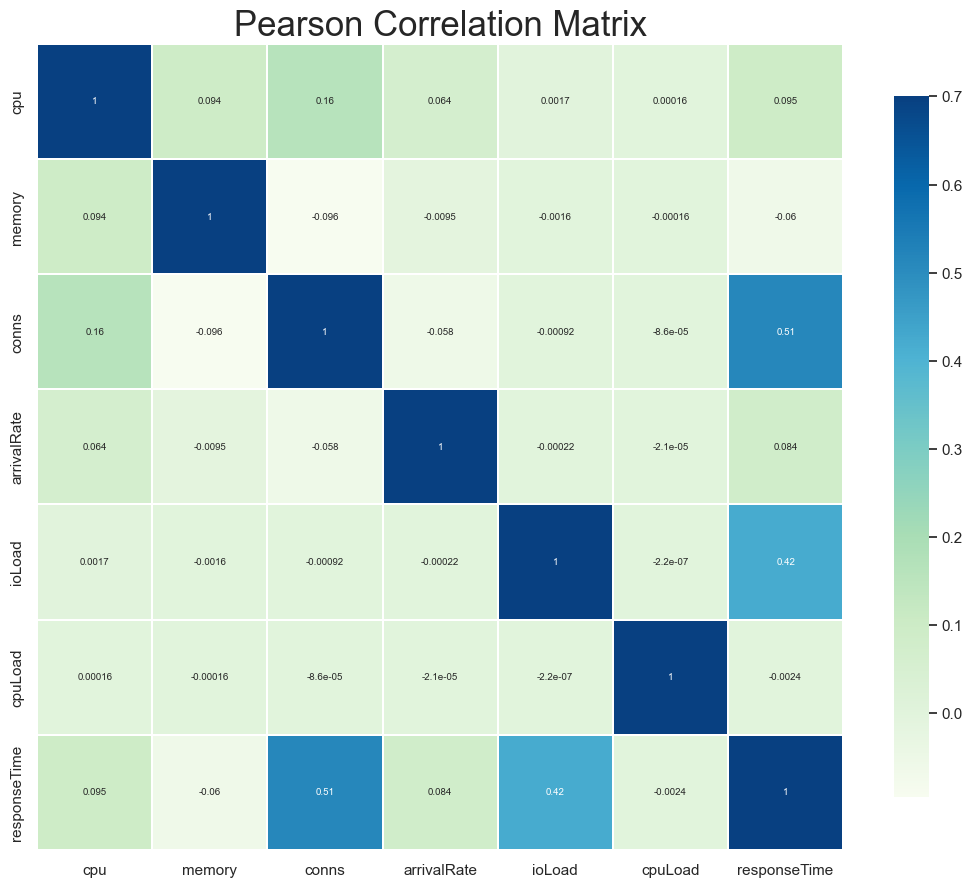

In [7]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [8]:
x_scaler = StandardScaler()
y_scaler = StandardScaler()

X = df.drop(['responseTime'], axis=1)
y = df['responseTime']

X_scaled = x_scaler.fit_transform(X.values)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1,1))


In [9]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.3,random_state=101)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X.values,y.values,test_size=0.3,random_state=101)


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train_orig = np.array(X_train_orig)
X_test_orig = np.array(X_test_orig)
y_train_orig = np.array(y_train_orig)
y_test_orig = np.array(y_test_orig)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8762, 6)
(3756, 6)
(8762, 1)
(3756, 1)


In [10]:
# For fiting and evaluating the model
def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    # predictions on the test set
    predictions = model.predict(X_test)

    print('MAE: ',mean_absolute_error(y_test,predictions))
    print('MSE: ',mean_squared_error(y_test,predictions))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Variance Regression Score: ',explained_variance_score(y_test,predictions))
    print('MAPE: ',mean_absolute_percentage_error(y_test,predictions))

    print('\n\nDescriptive Statistics:\n',df['responseTime'].describe())

    return predictions

# For error analysis and perfect fit line
def error_analysis(predictions, y_values):
    f, axes = plt.subplots(1, 2,figsize=(15,5))
    # Our model predictions
    plt.scatter(y_values,predictions, label='Predicted Normalised Response Time')
    # Perfect predictions
    plt.plot(y_values,y_values,'r', label='Actual Normalised Response Time')
    plt.legend()
    value_size = len(y_values)
    errors = y_values.reshape(value_size, 1) - predictions
    sns.distplot(errors, ax=axes[0])

    # sns.despine(left=True, bottom=True)
    axes[0].set(xlabel='Error in Normalised Response Time', ylabel='Probability Density', title='Error Histogram')
    axes[1].set(xlabel='Actual Normalised Responce Time', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

# Results Comparision
def results_comparison(predictions, y_values):
    y_values = np.array(y_values).reshape(-1,1)
    plt.figure(figsize=(15,5))

    plt.plot(y_values[:300,:], color = 'red', label = 'Actual Normalised Response Time')
    plt.plot(predictions[:300], color = 'blue', label = 'Predicted Normalised Response Time')
    plt.legend()
    plt.xlabel('Data Point Index')
    plt.ylabel('Normalised Response Time')
    plt.show()



# Linear Regression

In [32]:
lr = LinearRegression()
lr_predictions = fit_and_evaluate(lr, X_train, y_train, X_test, y_test)

lr_mape = mean_absolute_percentage_error(y_test,lr_predictions)

MAE:  0.4803415697522576
MSE:  0.5070705687463699
RMSE:  0.7120888769994725
Variance Regression Score:  0.45668411157252686
MAPE:  3.531015528883331


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


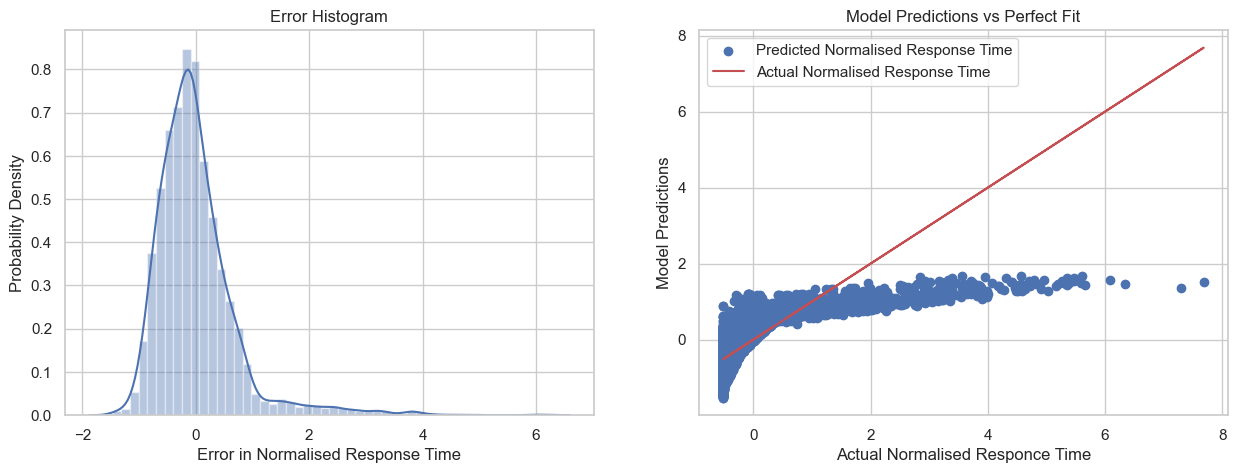

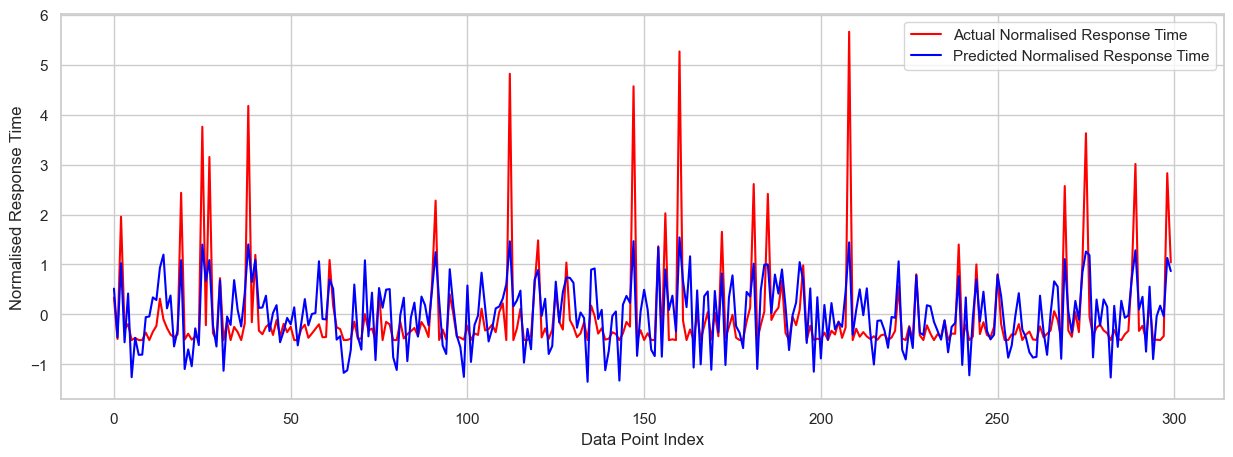

In [33]:
error_analysis(lr_predictions, y_test)
results_comparison(lr_predictions, y_test)

# Support Vector Regression

In [35]:
# Support Vector Regressor
svr = SVR(C=1000, gamma = 0.1)
svr_predictions = fit_and_evaluate(svr, X_train, y_train, X_test, y_test)

svr_mape = mean_absolute_percentage_error(y_test, svr_predictions)

MAE:  0.12470452930503009
MSE:  0.08022081902325634
RMSE:  0.28323280004839896
Variance Regression Score:  0.9140711414148112
MAPE:  0.8505662260580098


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


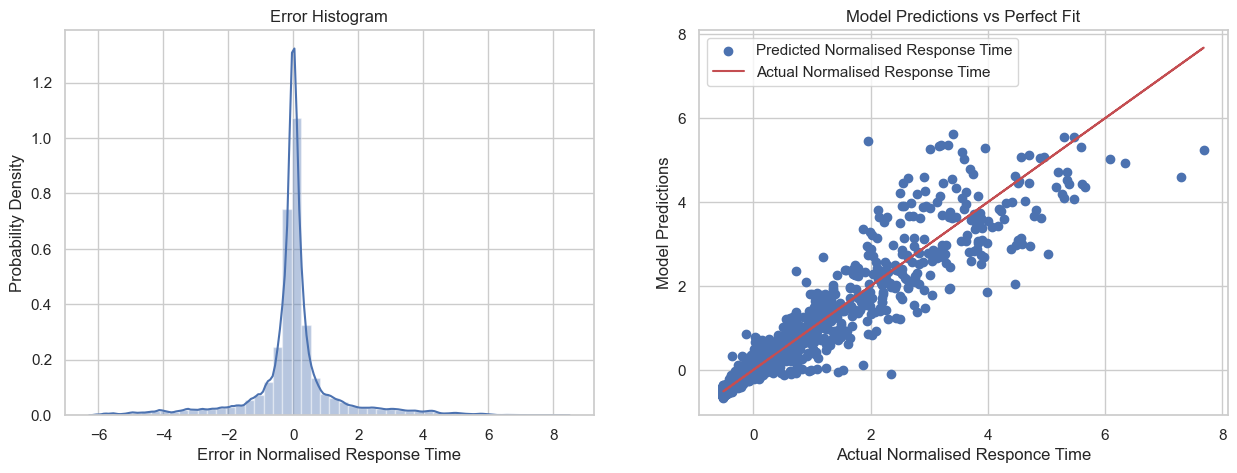

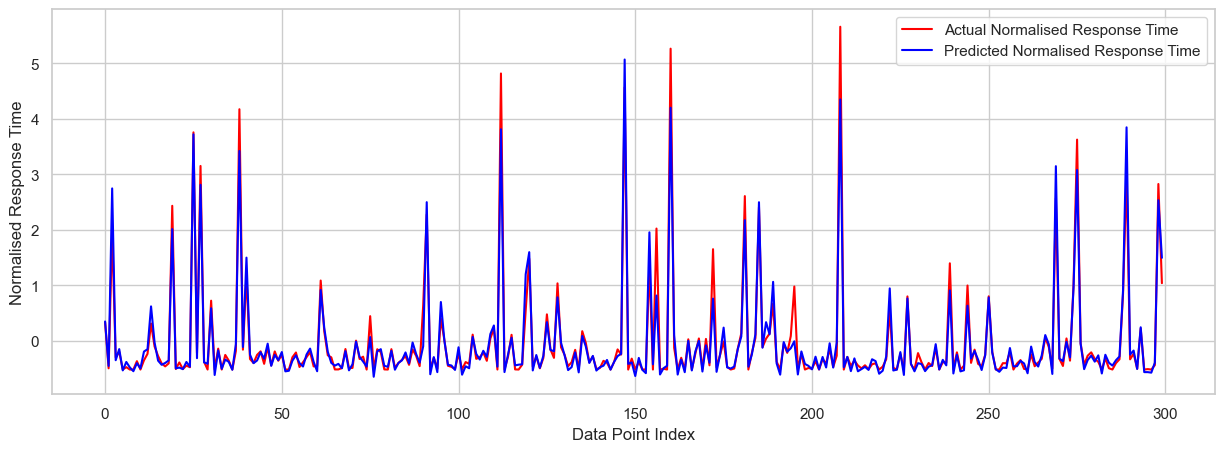

In [36]:
error_analysis(svr_predictions, y_test)
results_comparison(svr_predictions, y_test)

# Random Forest Regressor

In [37]:
# Random Forest Regressor
random_forest = RandomForestRegressor(random_state=60)
random_forest_predictions = fit_and_evaluate(random_forest, X_train, y_train, X_test, y_test)

random_forest_mape = mean_absolute_percentage_error(y_test,random_forest_predictions)

MAE:  0.08886684332843886
MSE:  0.07837790420835755
RMSE:  0.27996054044875246
Variance Regression Score:  0.9160253316307023
MAPE:  0.79627068547532


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


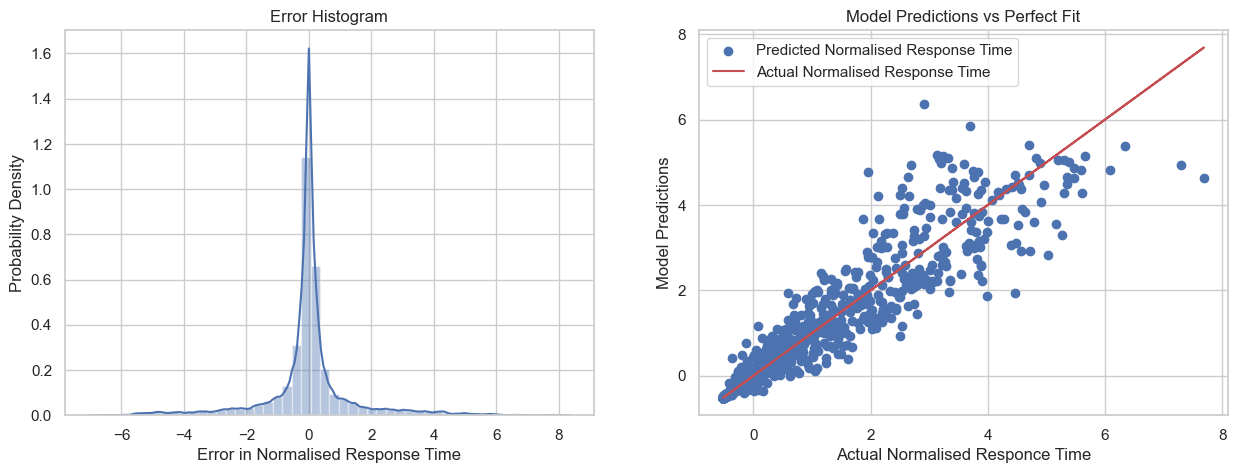

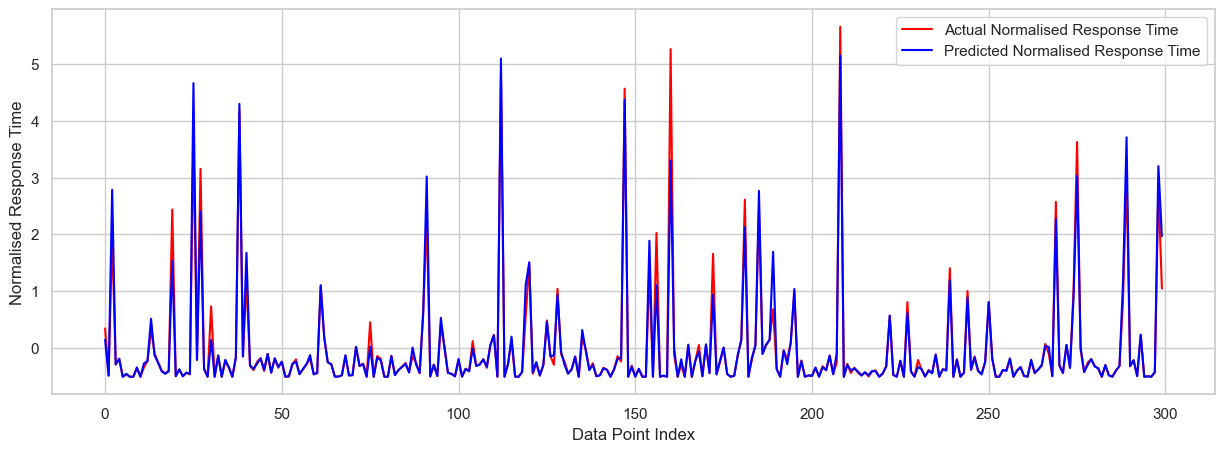

In [38]:
error_analysis(random_forest_predictions, y_test)
results_comparison(random_forest_predictions, y_test)

# Gradient Boosting Regressor

In [39]:
# Gradient Boosting Regressor
gradient_boosted = GradientBoostingRegressor(learning_rate = 0.1,random_state=60)
gradient_boosted_predictions = fit_and_evaluate(gradient_boosted, X_train, y_train, X_test, y_test)

gradient_boosted_mape = mean_absolute_percentage_error(y_test,gradient_boosted_predictions)

MAE:  0.15340085688004318
MSE:  0.08817180065892688
RMSE:  0.29693736824274386
Variance Regression Score:  0.9055650852432033
MAPE:  1.704134265767147


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


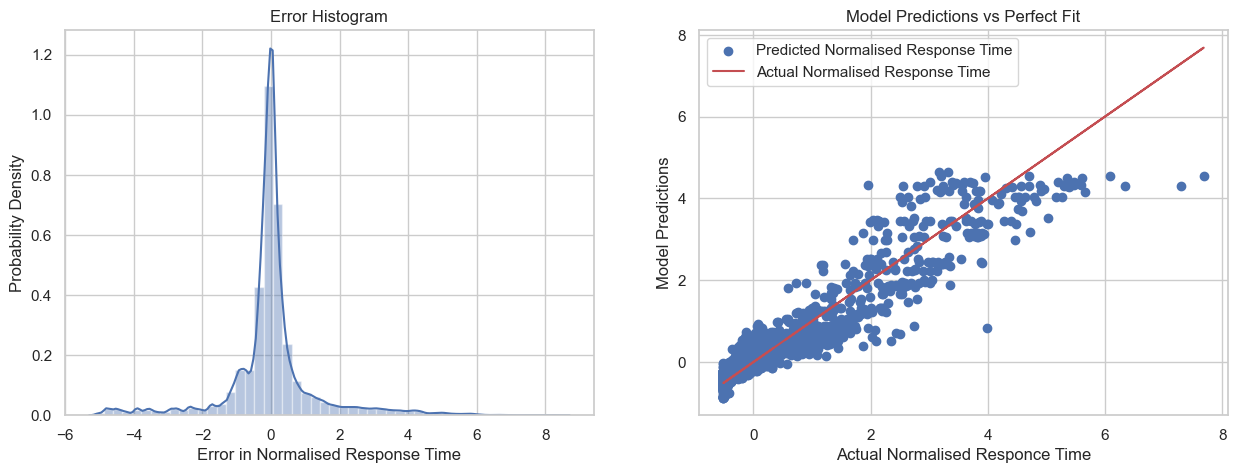

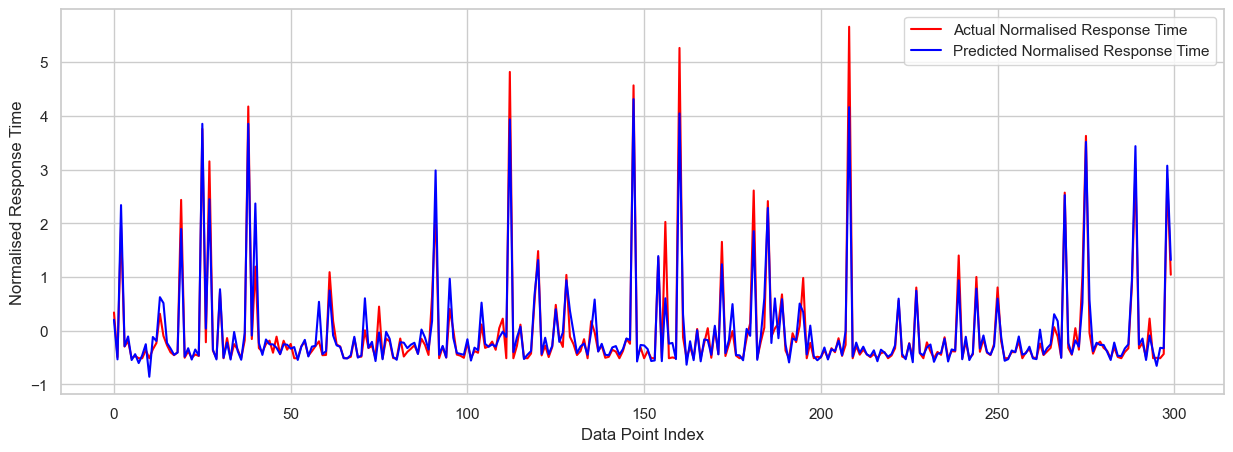

In [40]:
error_analysis(gradient_boosted_predictions, y_test)
results_comparison(gradient_boosted_predictions, y_test)

# Bagging Regressor

In [41]:
# Bagging Regressor
bagging = BaggingRegressor()
bagging_predictions = fit_and_evaluate(bagging, X_train, y_train, X_test, y_test)

bagging_mape = mean_absolute_percentage_error(y_test,bagging_predictions)

MAE:  0.09087683681768642
MSE:  0.08463518112574794
RMSE:  0.29092126275978514
Variance Regression Score:  0.9093265212045504
MAPE:  0.7786087555902949


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


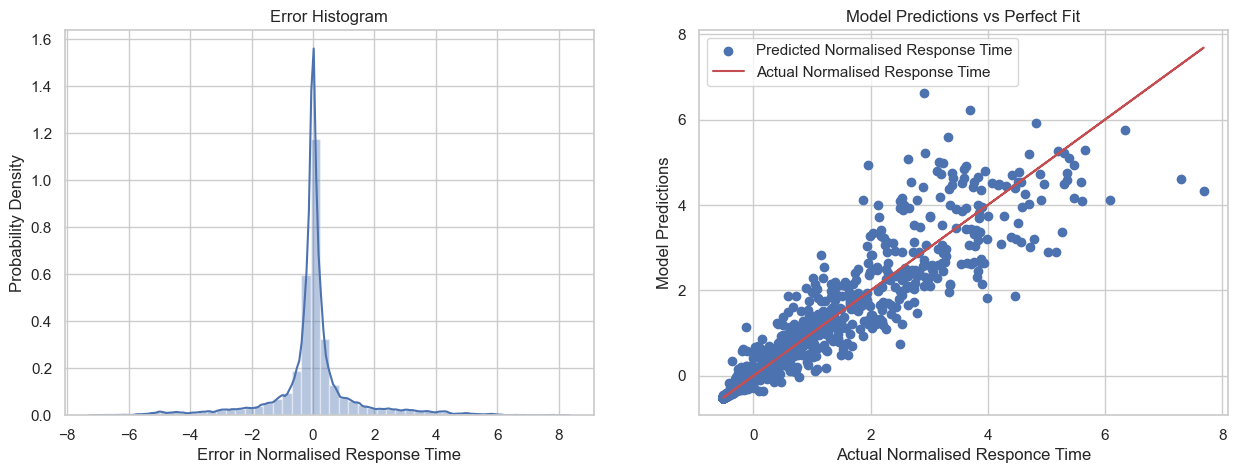

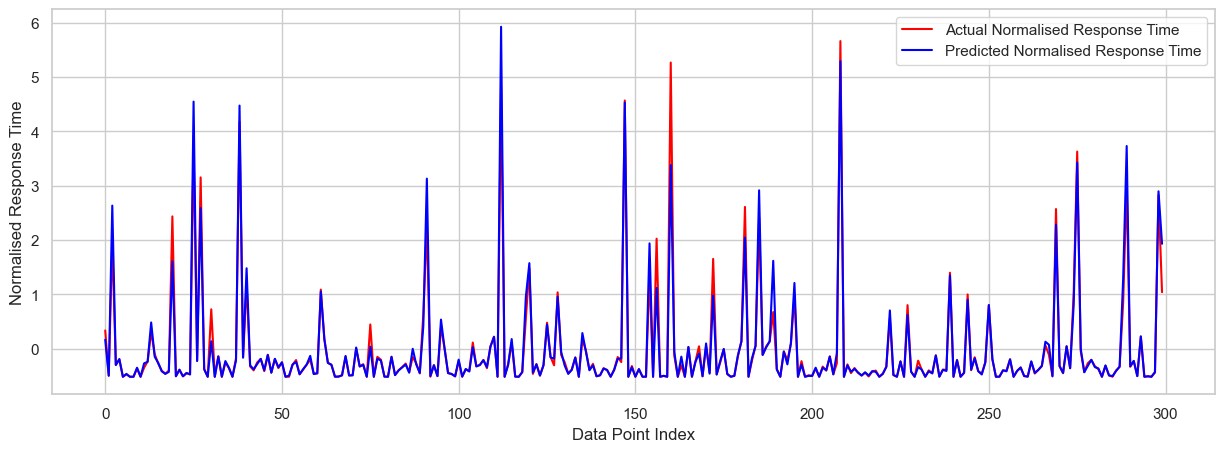

In [42]:
error_analysis(bagging_predictions, y_test)
results_comparison(bagging_predictions, y_test)

# XGB Regressor

In [43]:
#XGB Regressor
xboost = xgboost.XGBRegressor(random_state = 60)
xboost_predictions = fit_and_evaluate(xboost, X_train, y_train, X_test, y_test)

xboost_mape = mean_absolute_percentage_error(y_test,xboost_predictions)

MAE:  0.10122599522542397
MSE:  0.08708068202109907
RMSE:  0.2950943612153561
Variance Regression Score:  0.9067154781522219
MAPE:  0.9297912025547472


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


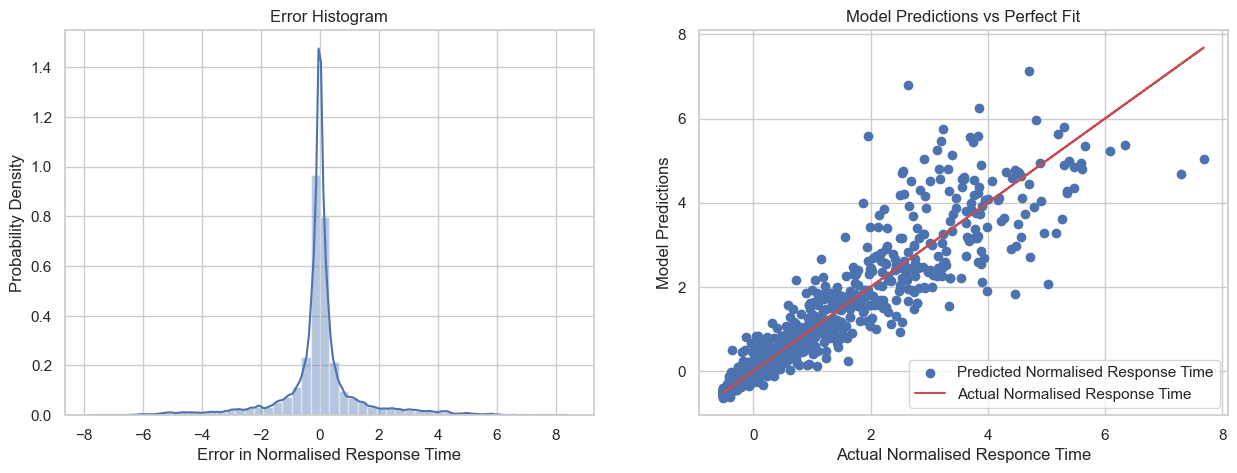

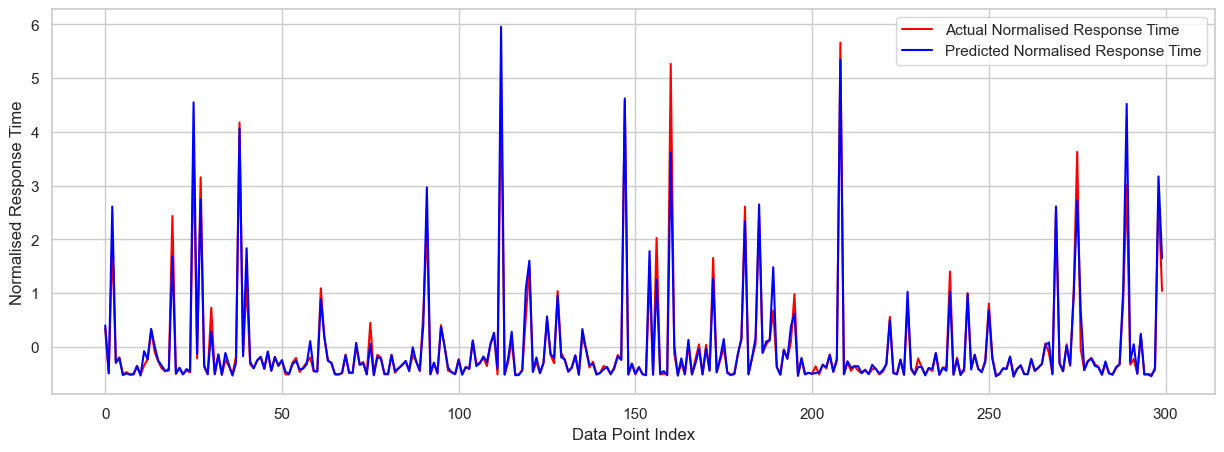

In [44]:
error_analysis(xboost_predictions, y_test)
results_comparison(xboost_predictions, y_test)

# KN Neighbors Regressor

In [45]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_predictions = fit_and_evaluate(knn, X_train, y_train, X_test, y_test)

knn_mape = mean_absolute_percentage_error(y_test,knn_predictions)

MAE:  0.10696631798731729
MSE:  0.07921549648052162
RMSE:  0.2814524764156848
Variance Regression Score:  0.9151229235303509
MAPE:  0.6450178768516006


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


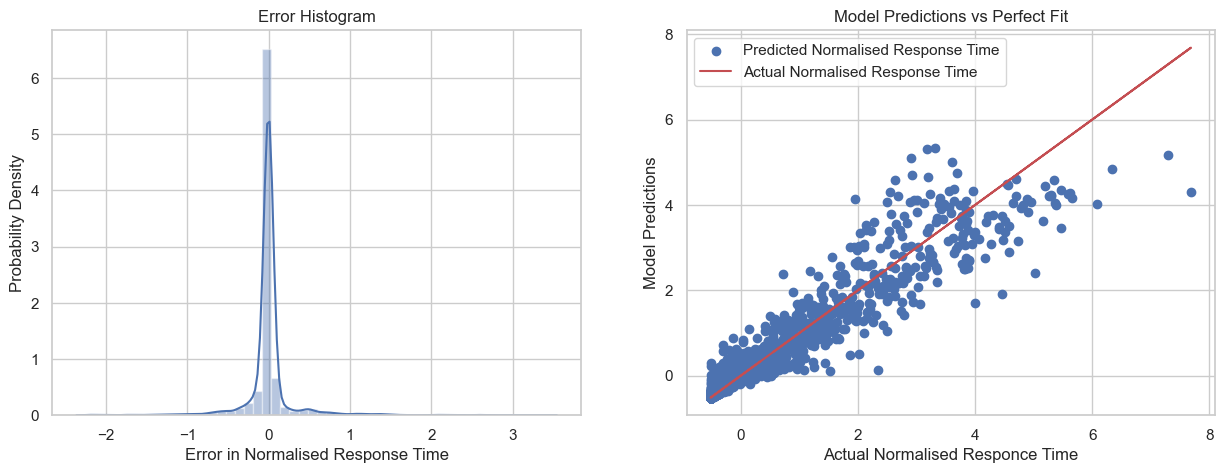

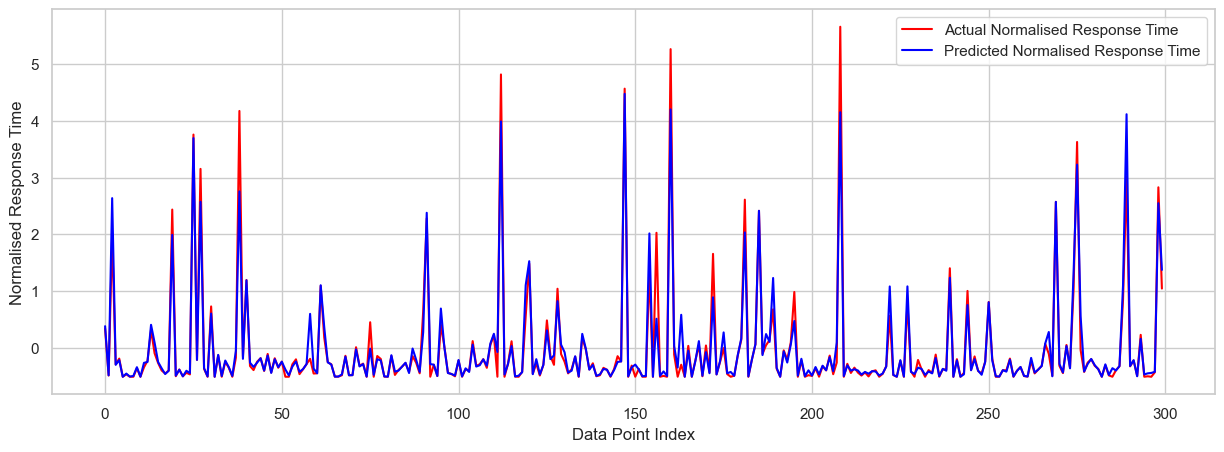

In [46]:
error_analysis(knn_predictions, y_test)
results_comparison(knn_predictions, y_test)

# Artificial Neural Network

In [47]:
ann = Sequential()
learning_rate = 0.0001

# input layer
ann.add(Dense(6,activation='gelu'))

# hidden layers
ann.add(Dense(16,activation='gelu'))
ann.add(Dense(64,activation='gelu'))
ann.add(Dense(16,activation='gelu'))

# output layer
ann.add(Dense(1))

ann.compile(optimizer=Adam(learning_rate=learning_rate),loss='mse')

ann.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=2000)

Epoch 1/2000
69/69 [==============================] - 1s 2ms/step - loss: 1.0070 - val_loss: 0.8677
Epoch 2/2000
69/69 [==============================] - 0s 1ms/step - loss: 0.9039 - val_loss: 0.7740
Epoch 3/2000
69/69 [==============================] - 0s 1ms/step - loss: 0.7976 - val_loss: 0.6871
Epoch 4/2000
69/69 [==============================] - 0s 999us/step - loss: 0.7102 - val_loss: 0.6249
Epoch 5/2000
69/69 [==============================] - 0s 981us/step - loss: 0.6501 - val_loss: 0.5857
Epoch 6/2000
69/69 [==============================] - 0s 1ms/step - loss: 0.6085 - val_loss: 0.5548
Epoch 7/2000
69/69 [==============================] - 0s 972us/step - loss: 0.5749 - val_loss: 0.5273
Epoch 8/2000
69/69 [==============================] - 0s 964us/step - loss: 0.5454 - val_loss: 0.5038
Epoch 9/2000
69/69 [==============================] - 0s 977us/step - loss: 0.5193 - val_loss: 0.4813
Epoch 10/2000
69/69 [==============================] - 0s 977us/step - loss: 0.4957 - val_

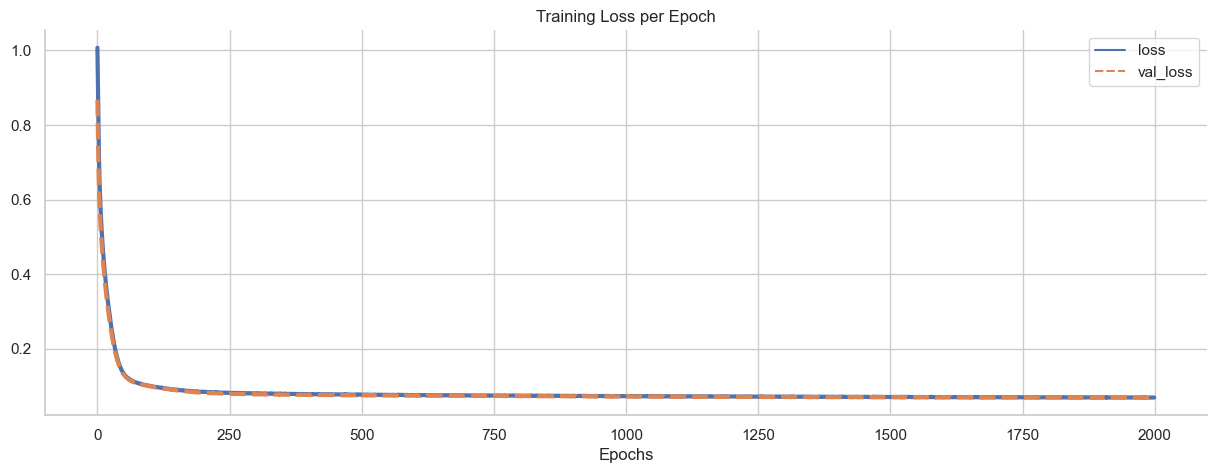

In [48]:
losses = pd.DataFrame(ann.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [49]:
ann_predictions = ann.predict(X_test)
ann_mape = mean_absolute_percentage_error(y_test,ann_predictions)
print('MAE: ',mean_absolute_error(y_test,ann_predictions))
print('MSE: ',mean_squared_error(y_test,ann_predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,ann_predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,ann_predictions))
print('MAPE: ',mean_absolute_percentage_error(y_test,ann_predictions))

print('\n\nDescriptive Statistics:\n',df['responseTime'].describe())

118/118 [==============================] - 0s 415us/step
MAE:  0.10363059129770773
MSE:  0.06919823350217218
RMSE:  0.26305557112931893
Variance Regression Score:  0.9258726915704435
MAPE:  0.9908300923974566


Descriptive Statistics:
 count    1.251800e+04
mean     1.117650e+05
std      2.173218e+05
min      8.500000e+00
25%      4.240850e+03
50%      2.946910e+04
75%      9.328825e+04
max      2.008239e+06
Name: responseTime, dtype: float64


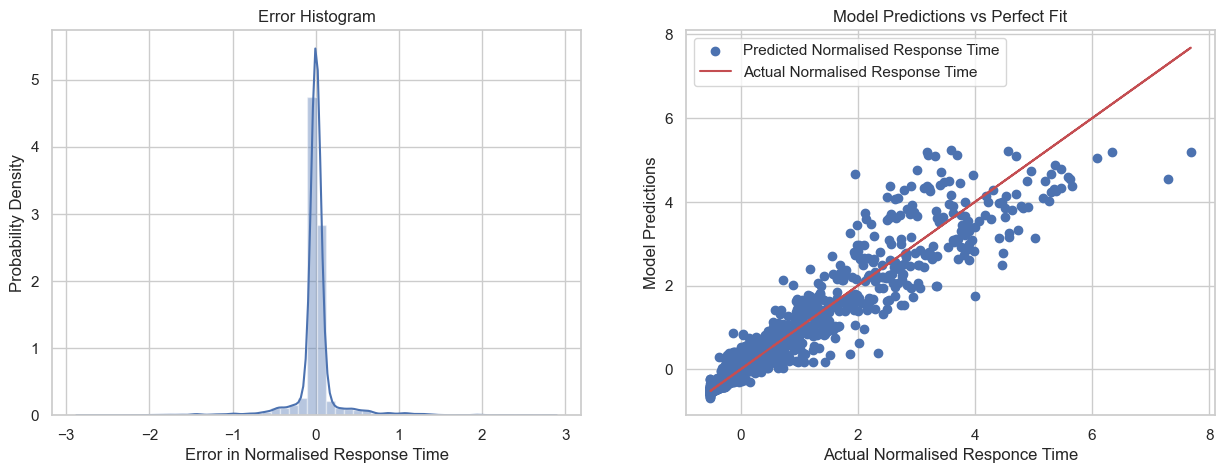

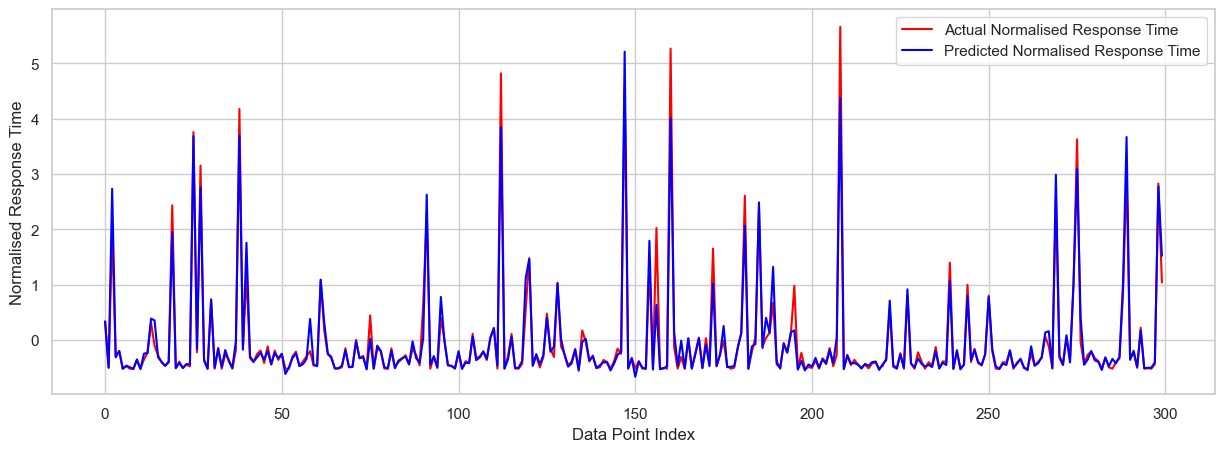

In [50]:
error_analysis(ann_predictions, y_test)
results_comparison(ann_predictions, y_test)

# Comparision of all models

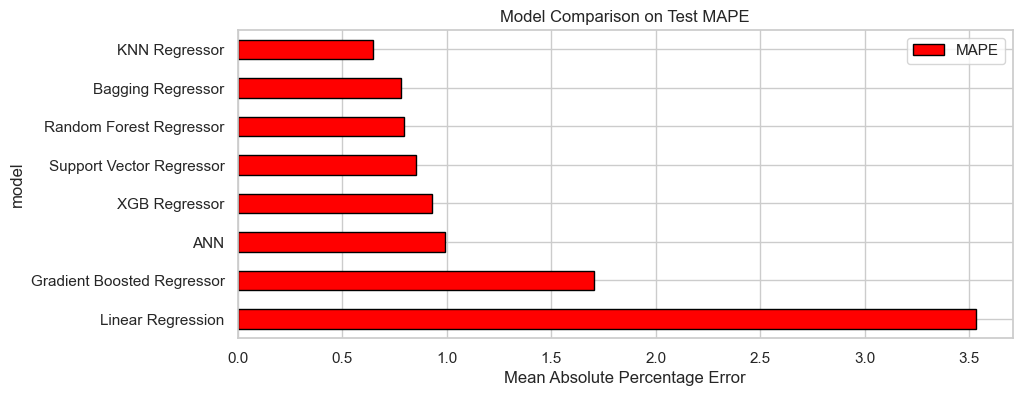

In [51]:
# Comparision of all the models
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Regressor',
                                           'Random Forest Regressor', 'Gradient Boosted Regressor',
                                           'KNN Regressor', 'Bagging Regressor','XGB Regressor','ANN'], 
                                'MAPE': [lr_mape, svr_mape, random_forest_mape, gradient_boosted_mape,
                                         knn_mape, bagging_mape, xboost_mape, ann_mape]})

model_comparison.sort_values('MAPE', ascending = False).plot(x = 'model',
                                                             y = 'MAPE', kind = 'barh', color = 'red',
                                                             edgecolor = 'black', figsize = (10,4))
plt.xlabel('Mean Absolute Percentage Error')
plt.title('Model Comparison on Test MAPE')
plt.show()

## Model Selection and Data Prediction
We will select Random Forest Regressor as our model for prediction as it has the highest accuracy score.

Let's predict the Response Time for new data.

1/1 [==============================] - 0s 12ms/step


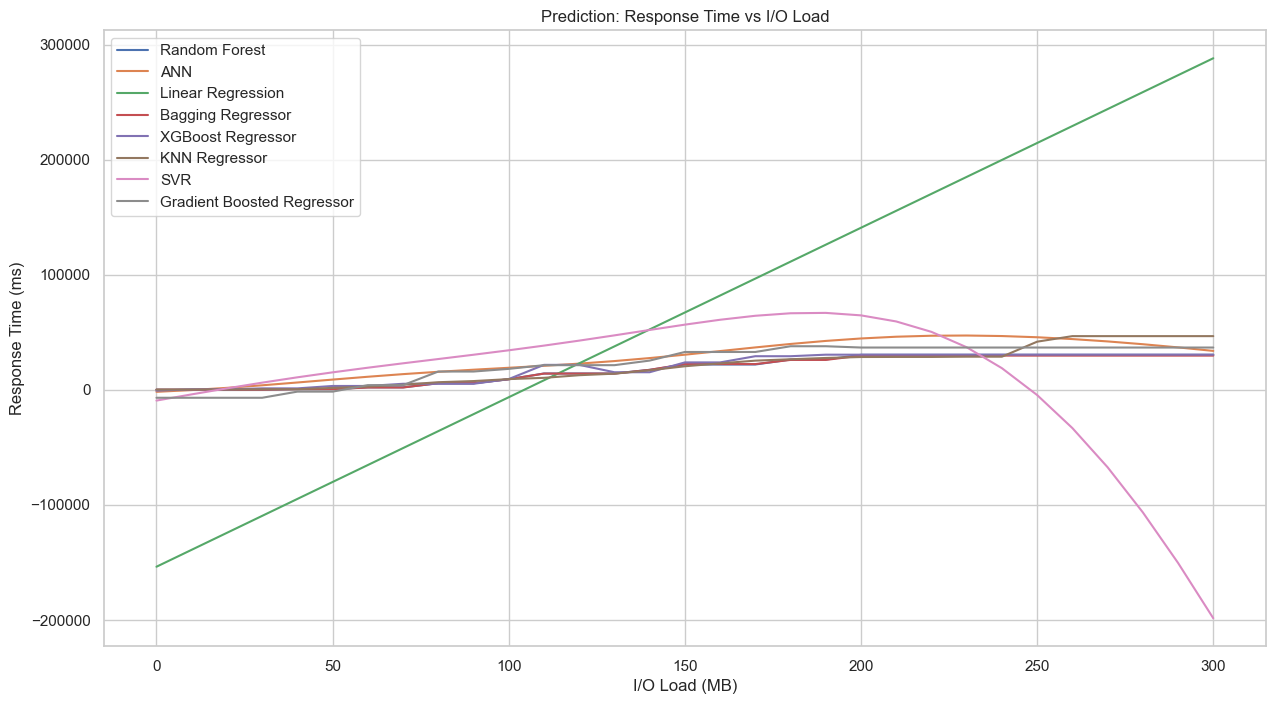

In [78]:
infer_cpu = 2
infer_mem = 700
infer_rate = 10
infer_cpuload = 400
fixed_conns = 30
fixed_io_load = 50

infer_io_range = list(range(0, 301, 10))

resp_io_X = np.array([[infer_cpu, infer_mem, fixed_conns, infer_rate, io_load, infer_cpuload] for io_load in infer_io_range ])

resp_io_X_scaled = x_scaler.transform(resp_io_X)

random_forest_io_resp = random_forest.predict(resp_io_X_scaled)
random_forest_io_resp_unscaled = y_scaler.inverse_transform(random_forest_io_resp.reshape(-1, 1))

ann_io_resp = ann.predict(resp_io_X_scaled)
ann_io_resp_unscaled = y_scaler.inverse_transform(ann_io_resp.reshape(-1, 1))

lr_io_resp = lr.predict(resp_io_X_scaled)
lr_io_resp_unscaled = y_scaler.inverse_transform(lr_io_resp.reshape(-1, 1))

bagging_io_resp = bagging.predict(resp_io_X_scaled)
bagging_io_resp_unscaled = y_scaler.inverse_transform(bagging_io_resp.reshape(-1, 1))

xboost_io_resp = xboost.predict(resp_io_X_scaled)
xboost_io_resp_unscaled = y_scaler.inverse_transform(xboost_io_resp.reshape(-1, 1))

knn_io_resp = knn.predict(resp_io_X_scaled)
knn_io_resp_unscaled = y_scaler.inverse_transform(knn_io_resp.reshape(-1, 1))

svr_io_resp = svr.predict(resp_io_X_scaled)
svr_io_resp_unscaled = y_scaler.inverse_transform(svr_io_resp.reshape(-1, 1))

gradient_boosted_io_resp = gradient_boosted.predict(resp_io_X_scaled)
gradient_boosted_io_resp_unscaled = y_scaler.inverse_transform(gradient_boosted_io_resp.reshape(-1, 1))

plt.figure(figsize=(15,8))
plt.plot(infer_io_range, random_forest_io_resp_unscaled, label='Random Forest')
plt.plot(infer_io_range, ann_io_resp_unscaled, label='ANN')
plt.plot(infer_io_range, lr_io_resp_unscaled, label='Linear Regression')
plt.plot(infer_io_range, bagging_io_resp_unscaled, label='Bagging Regressor')
plt.plot(infer_io_range, xboost_io_resp_unscaled, label='XGBoost Regressor')
plt.plot(infer_io_range, knn_io_resp_unscaled, label='KNN Regressor')
plt.plot(infer_io_range, svr_io_resp_unscaled, label='SVR')
plt.plot(infer_io_range, gradient_boosted_io_resp_unscaled, label='Gradient Boosted Regressor')

plt.xlabel('I/O Load (MB)')
plt.ylabel('Response Time (ms)')
plt.title('Prediction: Response Time vs I/O Load')
plt.legend()
plt.show()


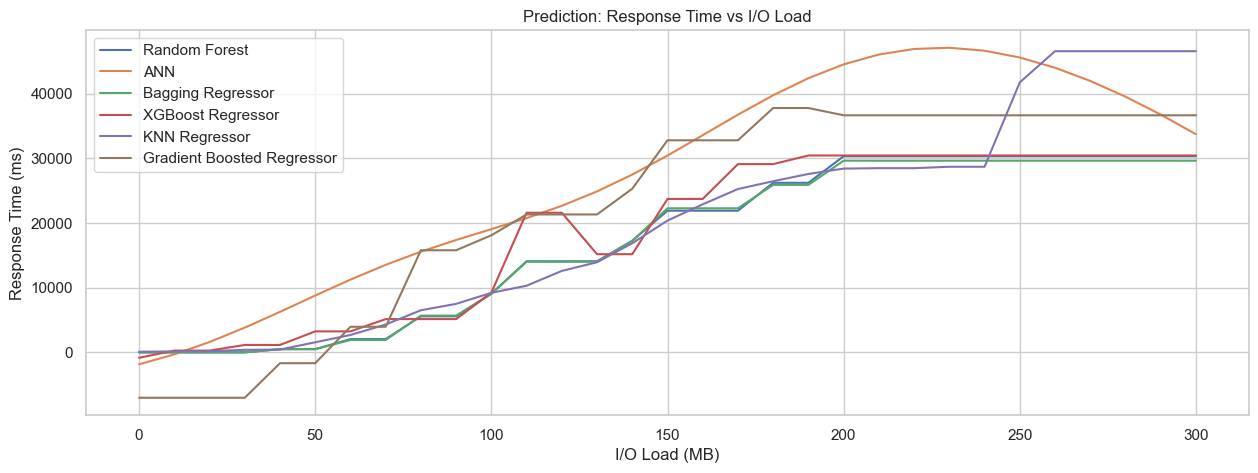

In [80]:

plt.figure(figsize=(15,5))
plt.plot(infer_io_range, random_forest_io_resp_unscaled, label='Random Forest')
plt.plot(infer_io_range, ann_io_resp_unscaled, label='ANN')
# plt.plot(infer_io_range, lr_io_resp_unscaled, label='Linear Regression')
plt.plot(infer_io_range, bagging_io_resp_unscaled, label='Bagging Regressor')
plt.plot(infer_io_range, xboost_io_resp_unscaled, label='XGBoost Regressor')
plt.plot(infer_io_range, knn_io_resp_unscaled, label='KNN Regressor')
# plt.plot(infer_io_range, svr_io_resp_unscaled, label='SVR')
plt.plot(infer_io_range, gradient_boosted_io_resp_unscaled, label='Gradient Boosted Regressor')


plt.xlabel('I/O Load (MB)')
plt.ylabel('Response Time (ms)')
plt.title('Prediction: Response Time vs I/O Load')
plt.legend()
plt.show()


1/1 [==============================] - 0s 12ms/step


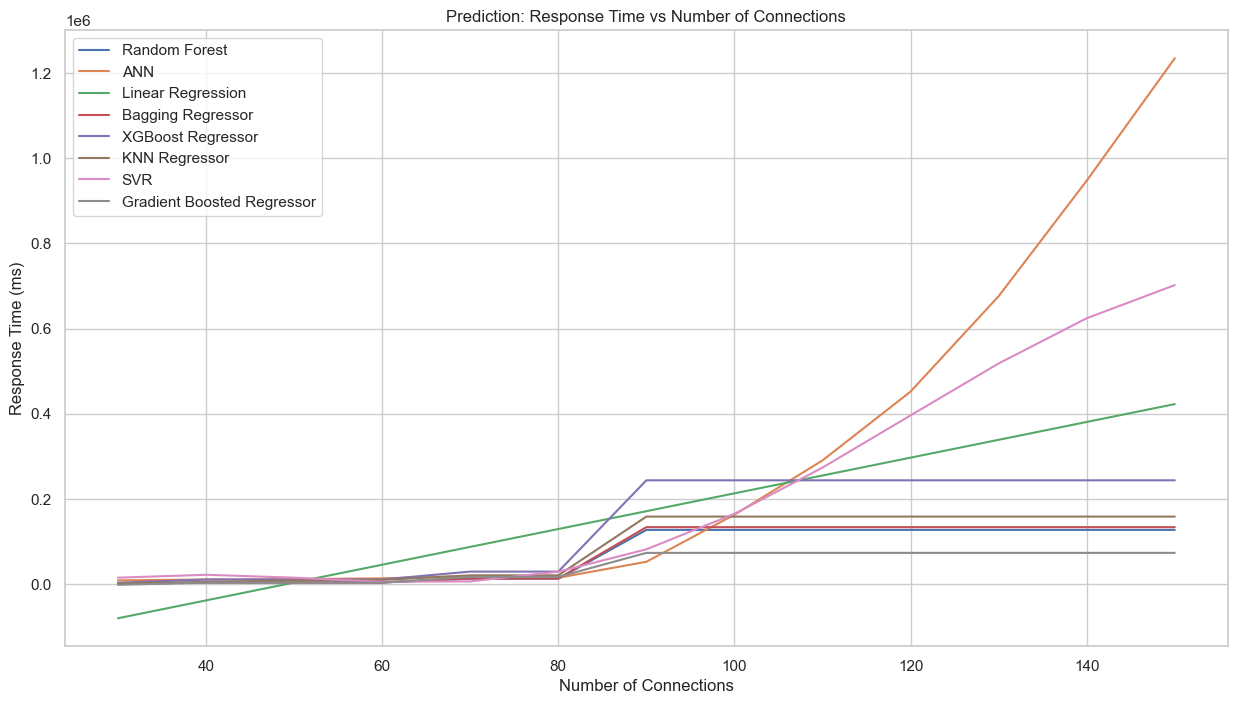

In [81]:
infer_conns_range = list(range(30, 151, 10))


resp_conns_X = np.array([[infer_cpu, infer_mem, conns, infer_rate, fixed_io_load, infer_cpuload] for conns in infer_conns_range ])

resp_conns_X_scaled = x_scaler.transform(resp_conns_X)

random_forest_conns_resp = random_forest.predict(resp_conns_X_scaled)
random_forest_conns_resp_unscaled = y_scaler.inverse_transform(random_forest_conns_resp.reshape(-1, 1))

ann_conns_resp = ann.predict(resp_conns_X_scaled)
ann_conns_resp_unscaled = y_scaler.inverse_transform(ann_conns_resp.reshape(-1, 1))

lr_conns_resp = lr.predict(resp_conns_X_scaled)
lr_conns_resp_unscaled = y_scaler.inverse_transform(lr_conns_resp.reshape(-1, 1))

bagging_conns_resp = bagging.predict(resp_conns_X_scaled)
bagging_conns_resp_unscaled = y_scaler.inverse_transform(bagging_conns_resp.reshape(-1, 1))

xboost_conns_resp = xboost.predict(resp_conns_X_scaled)
xboost_conns_resp_unscaled = y_scaler.inverse_transform(xboost_conns_resp.reshape(-1, 1))

knn_conns_resp = knn.predict(resp_conns_X_scaled)
knn_conns_resp_unscaled = y_scaler.inverse_transform(knn_conns_resp.reshape(-1, 1))

svr_conns_resp = svr.predict(resp_conns_X_scaled)
svr_conns_resp_unscaled = y_scaler.inverse_transform(svr_conns_resp.reshape(-1, 1))

gradient_boosted_conns_resp = gradient_boosted.predict(resp_conns_X_scaled)
gradient_boosted_conns_resp_unscaled = y_scaler.inverse_transform(gradient_boosted_conns_resp.reshape(-1, 1))

plt.figure(figsize=(15,8))
plt.plot(infer_conns_range, random_forest_conns_resp_unscaled, label='Random Forest')
plt.plot(infer_conns_range, ann_conns_resp_unscaled, label='ANN')
plt.plot(infer_conns_range, lr_conns_resp_unscaled, label='Linear Regression')
plt.plot(infer_conns_range, bagging_conns_resp_unscaled, label='Bagging Regressor')
plt.plot(infer_conns_range, xboost_conns_resp_unscaled, label='XGBoost Regressor')
plt.plot(infer_conns_range, knn_conns_resp_unscaled, label='KNN Regressor')
plt.plot(infer_conns_range, svr_conns_resp_unscaled, label='SVR')
plt.plot(infer_conns_range, gradient_boosted_conns_resp_unscaled, label='Gradient Boosted Regressor')

plt.xlabel('Number of Connections')
plt.ylabel('Response Time (ms)')
plt.title('Prediction: Response Time vs Number of Connections')
plt.legend()
plt.show()


# Results and Plots

In [56]:
def get_resp_from_df(df, X):
    res = []
    not_found_count = 0
    for x in X:
        filtered = df.query(f'cpu == {x[0]} and memory == {x[1]} and conns == {x[2]} and arrivalRate == {x[3]} and ioLoad == {x[4]} and cpuLoad == {x[5]}')['responseTime'].values
        if len(filtered) != 1:
            print(f'Error: {len(filtered)} values found for {x}')
            not_found_count += 1
        else:
            res.append(filtered[0])
    print(f'Not found count: {not_found_count}')
    return res

In [57]:

res_cpu = 4
res_mem = 700
res_conns = 25
res_rate = 5
res_io_load = 60
res_cpuload = 400

res_conns_range = list(range(25, 101, 25))
res_rate_range = list(range(1, 21, 1))
res_io_load_range = list(range(0, 201, 20))
res_cpuload_range = list(range(350, 501, 50))


# resp_io_X = np.array([[res_cpu, res_mem, fixed_conns, res_rate, io_load, res_cpuload] for io_load in res_io_range ])

# random_forest_io_resp = ann.predict(resp_io_X)

# random_forest_io_resp_unscaled = y_scaler.inverse_transform(random_forest_io_resp.reshape(-1, 1))

# plt.figure(figsize=(15,5))
# plt.plot(res_io_range, random_forest_io_resp_unscaled, label='Response Time')
# plt.xlabel('I/O Load')
# plt.ylabel('Response Time (ms)')
# plt.title('Prediction: Response Time vs I/O Load')
# plt.show()


Not found count: 0
1/1 [==============================] - 0s 11ms/step


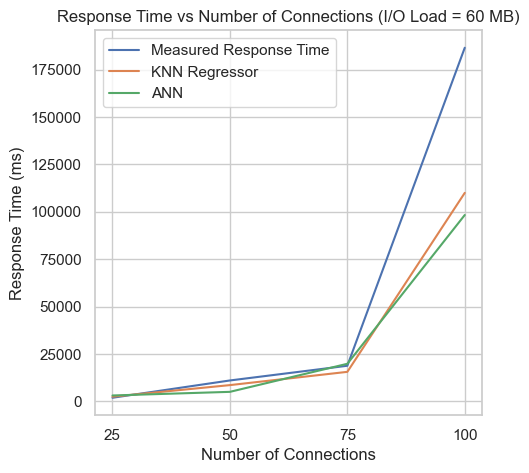

In [89]:
# varying connections 

resp_conns_X = np.array([[res_cpu, res_mem, conns, res_rate, res_io_load, res_cpuload] for conns in res_conns_range ])
measured_resp_conns = get_resp_from_df(df, resp_conns_X)

resp_conns_X_scaled = x_scaler.transform(resp_conns_X)
knn_conns_resp = knn.predict(resp_conns_X_scaled)
knn_conns_resp_unscaled = y_scaler.inverse_transform(knn_conns_resp.reshape(-1, 1))

ann_conns_resp = ann.predict(resp_conns_X_scaled)
ann_conns_resp_unscaled = y_scaler.inverse_transform(ann_conns_resp.reshape(-1, 1))

plt.figure(figsize=(5,5))
plt.plot(res_conns_range, measured_resp_conns, label='Measured Response Time')
plt.plot(res_conns_range, knn_conns_resp_unscaled, label='KNN Regressor')
plt.plot(res_conns_range, ann_conns_resp_unscaled, label='ANN')
plt.xlabel('Number of Connections')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs Number of Connections (I/O Load = 60 MB)')
plt.xticks(res_conns_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 12ms/step


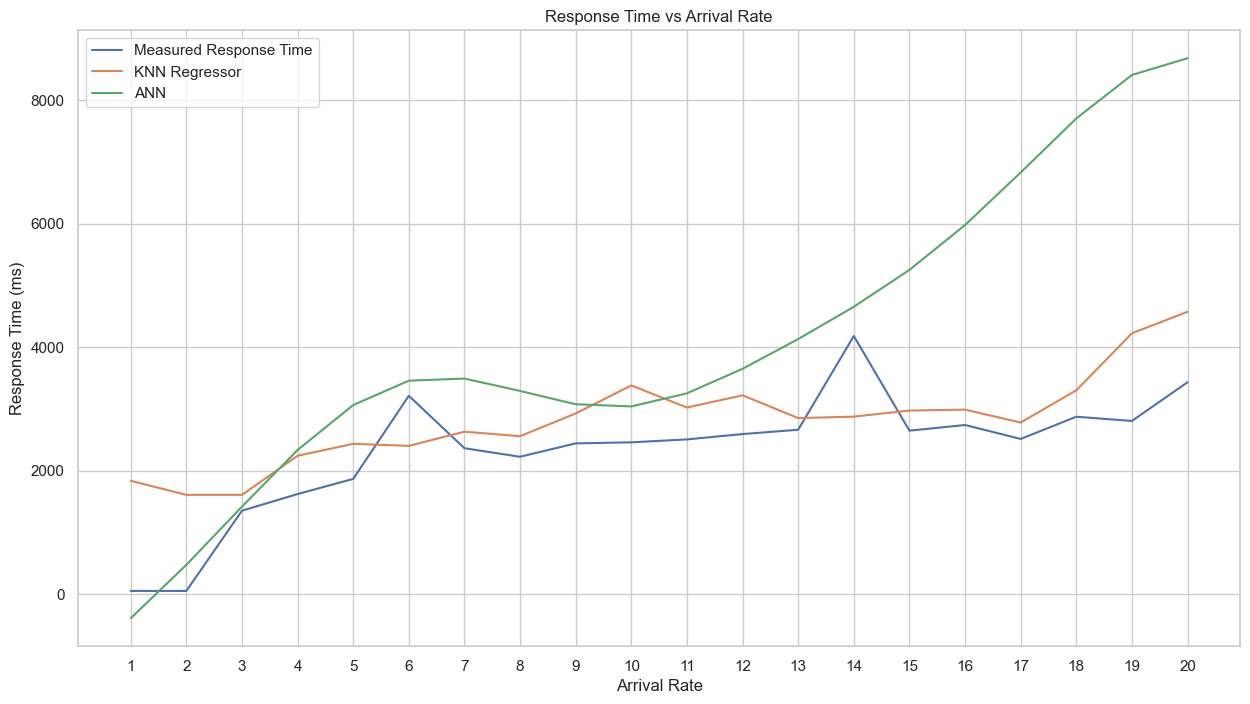

In [75]:
resp_rate_X = np.array([[res_cpu, res_mem, res_conns, rate, res_io_load, res_cpuload] for rate in res_rate_range ])
measured_resp_rate = get_resp_from_df(df, resp_rate_X)

resp_rate_X_scaled = x_scaler.transform(resp_rate_X)
knn_rate_resp = knn.predict(resp_rate_X_scaled)
knn_rate_resp_unscaled = y_scaler.inverse_transform(knn_rate_resp.reshape(-1, 1))

ann_rate_resp = ann.predict(resp_rate_X_scaled)
ann_rate_resp_unscaled = y_scaler.inverse_transform(ann_rate_resp.reshape(-1, 1))


plt.figure(figsize=(15,8))
plt.plot(res_rate_range, measured_resp_rate, label='Measured Response Time')
plt.plot(res_rate_range, knn_rate_resp_unscaled, label='KNN Regressor')
plt.plot(res_rate_range, ann_rate_resp_unscaled, label='ANN')
plt.xlabel('Arrival Rate')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs Arrival Rate')
plt.xticks(res_rate_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 12ms/step


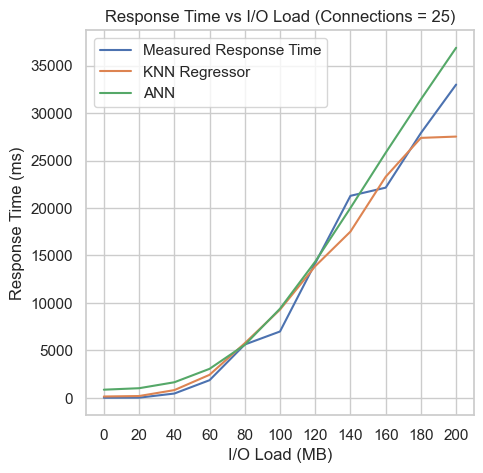

In [93]:
resp_io_X = np.array([[res_cpu, res_mem, res_conns, res_rate, io_load, res_cpuload] for io_load in res_io_load_range ])
measured_resp_io = get_resp_from_df(df, resp_io_X)

resp_io_X_scaled = x_scaler.transform(resp_io_X)
knn_io_resp = knn.predict(resp_io_X_scaled)
knn_io_resp_unscaled = y_scaler.inverse_transform(knn_io_resp.reshape(-1, 1))

ann_io_resp = ann.predict(resp_io_X_scaled)
ann_io_resp_unscaled = y_scaler.inverse_transform(ann_io_resp.reshape(-1, 1))

plt.figure(figsize=(5,5))
plt.plot(res_io_load_range, measured_resp_io, label='Measured Response Time')
plt.plot(res_io_load_range, knn_io_resp_unscaled, label='KNN Regressor')
plt.plot(res_io_load_range, ann_io_resp_unscaled, label='ANN')
plt.xlabel('I/O Load (MB)')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs I/O Load (Connections = 25)')
plt.xticks(res_io_load_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 13ms/step


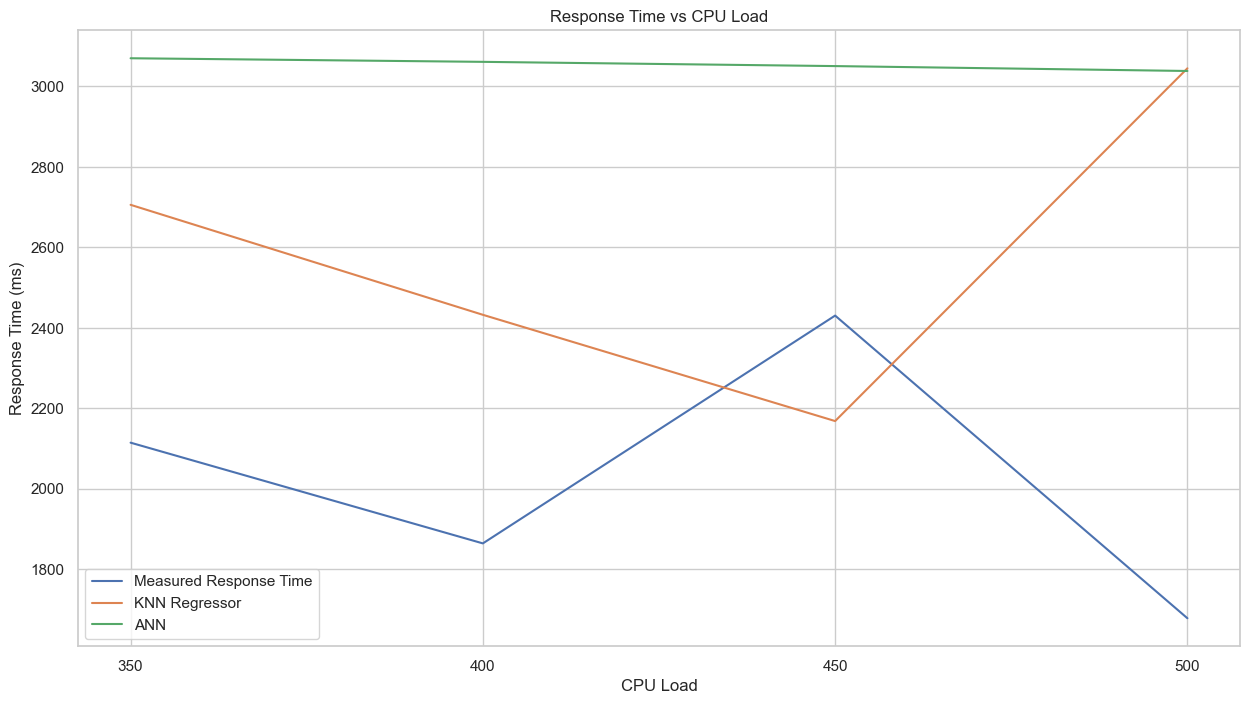

In [77]:
resp_cpuload_X = np.array([[res_cpu, res_mem, res_conns, res_rate, res_io_load, cpuload] for cpuload in res_cpuload_range ])
measured_resp_cpuload = get_resp_from_df(df, resp_cpuload_X)

resp_cpuload_X_scaled = x_scaler.transform(resp_cpuload_X)
knn_cpuload_resp = knn.predict(resp_cpuload_X_scaled)
knn_cpuload_resp_unscaled = y_scaler.inverse_transform(knn_cpuload_resp.reshape(-1, 1))

ann_cpuload_resp = ann.predict(resp_cpuload_X_scaled)
ann_cpuload_resp_unscaled = y_scaler.inverse_transform(ann_cpuload_resp.reshape(-1, 1))

plt.figure(figsize=(15,8))
plt.plot(res_cpuload_range, measured_resp_cpuload, label='Measured Response Time')
plt.plot(res_cpuload_range, knn_cpuload_resp_unscaled, label='KNN Regressor')
plt.plot(res_cpuload_range, ann_cpuload_resp_unscaled, label='ANN')
plt.xlabel('CPU Load')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs CPU Load')
plt.xticks(res_cpuload_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 12ms/step


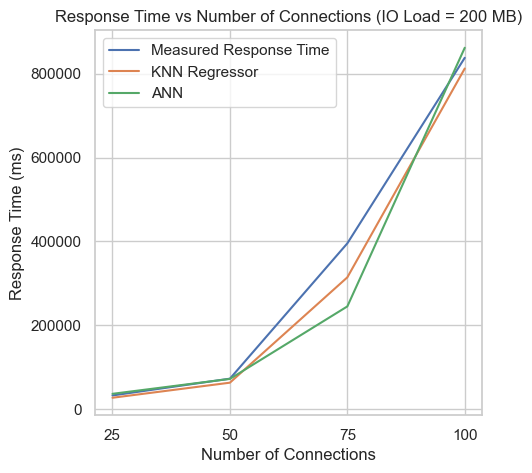

In [85]:
resp_conns_X = np.array([[res_cpu, res_mem, conns, res_rate, 200, res_cpuload] for conns in res_conns_range ])
measured_resp_conns = get_resp_from_df(df, resp_conns_X)

resp_conns_X_scaled = x_scaler.transform(resp_conns_X)
knn_conns_resp = knn.predict(resp_conns_X_scaled)
knn_conns_resp_unscaled = y_scaler.inverse_transform(knn_conns_resp.reshape(-1, 1))

ann_conns_resp = ann.predict(resp_conns_X_scaled)
ann_conns_resp_unscaled = y_scaler.inverse_transform(ann_conns_resp.reshape(-1, 1))

plt.figure(figsize=(5,5))
plt.plot(res_conns_range, measured_resp_conns, label='Measured Response Time')
plt.plot(res_conns_range, knn_conns_resp_unscaled, label='KNN Regressor')
plt.plot(res_conns_range, ann_conns_resp_unscaled, label='ANN')
plt.xlabel('Number of Connections')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs Number of Connections (IO Load = 200 MB)')
plt.xticks(res_conns_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 12ms/step


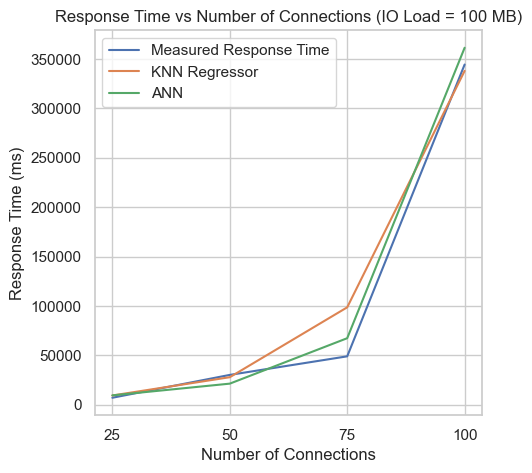

In [87]:
resp_conns_X = np.array([[res_cpu, res_mem, conns, res_rate, 100, res_cpuload] for conns in res_conns_range ])
measured_resp_conns = get_resp_from_df(df, resp_conns_X)

resp_conns_X_scaled = x_scaler.transform(resp_conns_X)
knn_conns_resp = knn.predict(resp_conns_X_scaled)
knn_conns_resp_unscaled = y_scaler.inverse_transform(knn_conns_resp.reshape(-1, 1))

ann_conns_resp = ann.predict(resp_conns_X_scaled)
ann_conns_resp_unscaled = y_scaler.inverse_transform(ann_conns_resp.reshape(-1, 1))

plt.figure(figsize=(5,5))
plt.plot(res_conns_range, measured_resp_conns, label='Measured Response Time')
plt.plot(res_conns_range, knn_conns_resp_unscaled, label='KNN Regressor')
plt.plot(res_conns_range, ann_conns_resp_unscaled, label='ANN')
plt.xlabel('Number of Connections')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs Number of Connections (IO Load = 100 MB)')
plt.xticks(res_conns_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 12ms/step


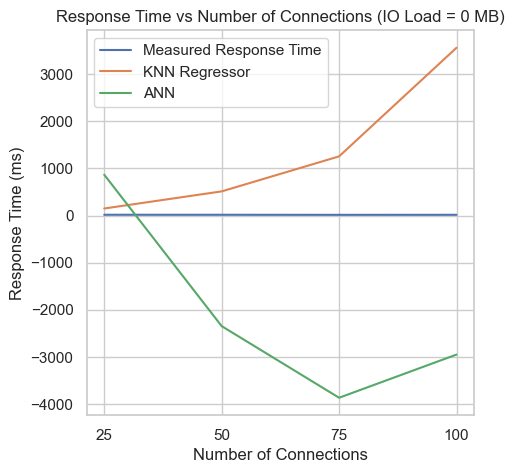

In [88]:
resp_conns_X = np.array([[res_cpu, res_mem, conns, res_rate, 0, res_cpuload] for conns in res_conns_range ])
measured_resp_conns = get_resp_from_df(df, resp_conns_X)

resp_conns_X_scaled = x_scaler.transform(resp_conns_X)
knn_conns_resp = knn.predict(resp_conns_X_scaled)
knn_conns_resp_unscaled = y_scaler.inverse_transform(knn_conns_resp.reshape(-1, 1))

ann_conns_resp = ann.predict(resp_conns_X_scaled)
ann_conns_resp_unscaled = y_scaler.inverse_transform(ann_conns_resp.reshape(-1, 1))

plt.figure(figsize=(5,5))
plt.plot(res_conns_range, measured_resp_conns, label='Measured Response Time')
plt.plot(res_conns_range, knn_conns_resp_unscaled, label='KNN Regressor')
plt.plot(res_conns_range, ann_conns_resp_unscaled, label='ANN')
plt.xlabel('Number of Connections')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs Number of Connections (IO Load = 0 MB)')
plt.xticks(res_conns_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 12ms/step


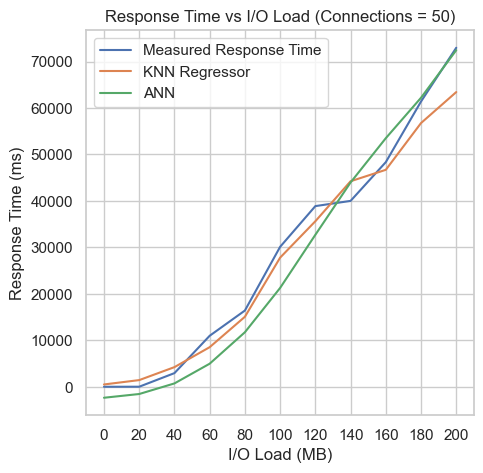

In [92]:
resp_io_X = np.array([[res_cpu, res_mem, 50, res_rate, io_load, res_cpuload] for io_load in res_io_load_range ])
measured_resp_io = get_resp_from_df(df, resp_io_X)

resp_io_X_scaled = x_scaler.transform(resp_io_X)
knn_io_resp = knn.predict(resp_io_X_scaled)
knn_io_resp_unscaled = y_scaler.inverse_transform(knn_io_resp.reshape(-1, 1))

ann_io_resp = ann.predict(resp_io_X_scaled)
ann_io_resp_unscaled = y_scaler.inverse_transform(ann_io_resp.reshape(-1, 1))

plt.figure(figsize=(5,5))
plt.plot(res_io_load_range, measured_resp_io, label='Measured Response Time')
plt.plot(res_io_load_range, knn_io_resp_unscaled, label='KNN Regressor')
plt.plot(res_io_load_range, ann_io_resp_unscaled, label='ANN')
plt.xlabel('I/O Load (MB)')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs I/O Load (Connections = 50)')
plt.xticks(res_io_load_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 15ms/step


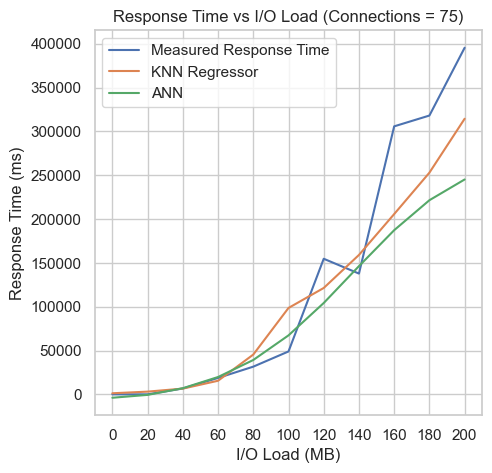

In [90]:
resp_io_X = np.array([[res_cpu, res_mem, 75, res_rate, io_load, res_cpuload] for io_load in res_io_load_range ])
measured_resp_io = get_resp_from_df(df, resp_io_X)

resp_io_X_scaled = x_scaler.transform(resp_io_X)
knn_io_resp = knn.predict(resp_io_X_scaled)
knn_io_resp_unscaled = y_scaler.inverse_transform(knn_io_resp.reshape(-1, 1))

ann_io_resp = ann.predict(resp_io_X_scaled)
ann_io_resp_unscaled = y_scaler.inverse_transform(ann_io_resp.reshape(-1, 1))

plt.figure(figsize=(5,5))
plt.plot(res_io_load_range, measured_resp_io, label='Measured Response Time')
plt.plot(res_io_load_range, knn_io_resp_unscaled, label='KNN Regressor')
plt.plot(res_io_load_range, ann_io_resp_unscaled, label='ANN')
plt.xlabel('I/O Load (MB)')
plt.ylabel('Response Time (ms)')
plt.title('Response Time vs I/O Load (Connections = 75)')
plt.xticks(res_io_load_range)
plt.legend()
plt.show()

Not found count: 0
1/1 [==============================] - 0s 11ms/step


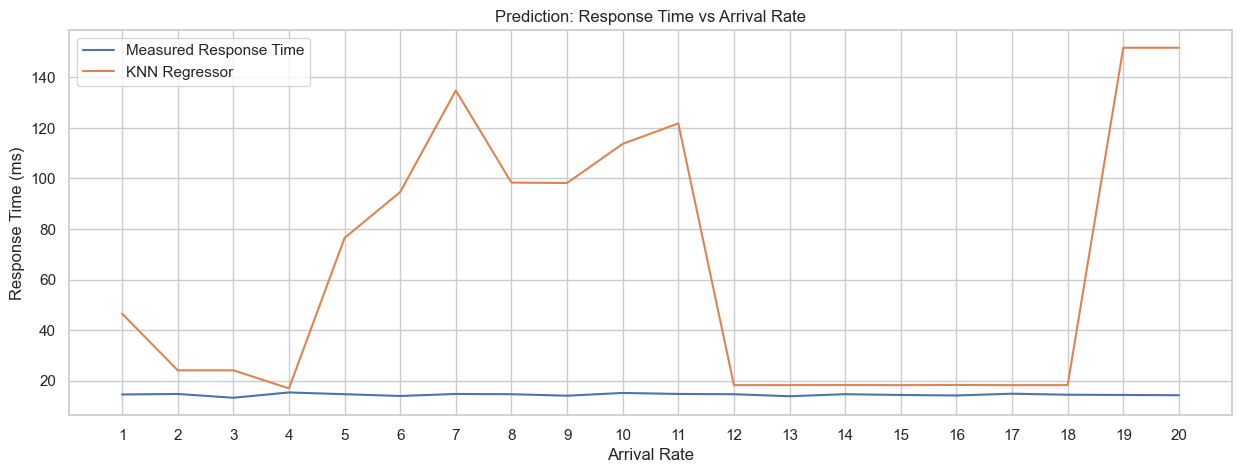

In [69]:
resp_rate_X = np.array([[1, res_mem, 25, rate, 0, 350] for rate in res_rate_range ])
measured_resp_rate = get_resp_from_df(df, resp_rate_X)

resp_rate_X_scaled = x_scaler.transform(resp_rate_X)
knn_rate_resp = knn.predict(resp_rate_X_scaled)
knn_rate_resp_unscaled = y_scaler.inverse_transform(knn_rate_resp.reshape(-1, 1))

ann_rate_resp = ann.predict(resp_rate_X_scaled)
ann_rate_resp_unscaled = y_scaler.inverse_transform(ann_rate_resp.reshape(-1, 1))


plt.figure(figsize=(15,5))
plt.plot(res_rate_range, measured_resp_rate, label='Measured Response Time')
plt.plot(res_rate_range, knn_rate_resp_unscaled, label='KNN Regressor')
# plt.plot(res_rate_range, ann_rate_resp_unscaled, label='ANN')
plt.xlabel('Arrival Rate')
plt.ylabel('Response Time (ms)')
plt.title('Prediction: Response Time vs Arrival Rate')
plt.xticks(res_rate_range)
plt.legend()
plt.show()

In [99]:
res_cpu = 4
res_mem = 700
res_conns = 100
res_io_load = 100
res_cpuload = 400


res_rate_range = list(range(1, 21, 1))


Not found count: 0
1/1 [==============================] - 0s 12ms/step


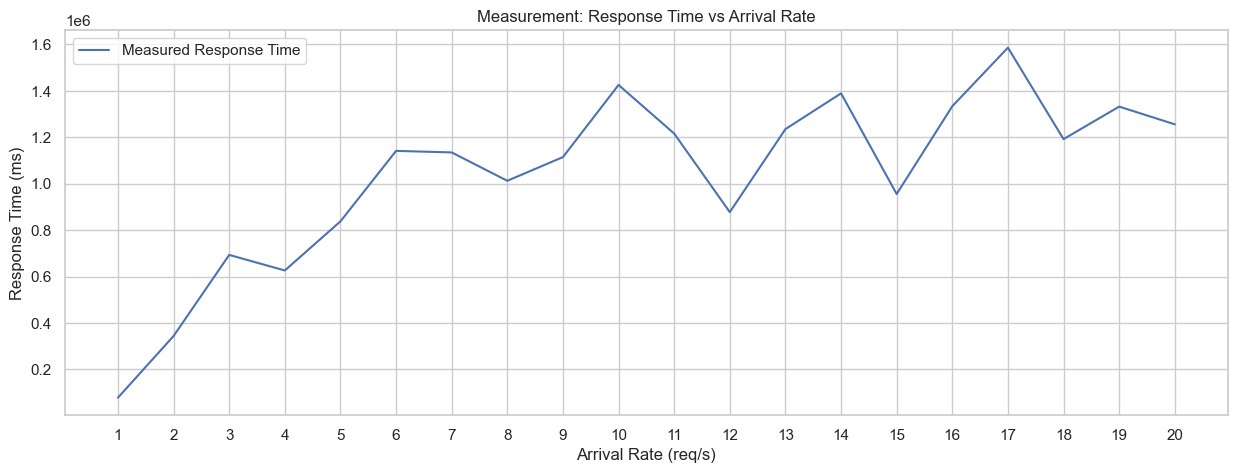

In [101]:
resp_rate_X = np.array([[res_cpu, res_mem, res_conns, rate, res_io_load, res_cpuload] for rate in res_rate_range ])
measured_resp_rate = get_resp_from_df(df, resp_rate_X)

resp_rate_X_scaled = x_scaler.transform(resp_rate_X)
knn_rate_resp = knn.predict(resp_rate_X_scaled)
knn_rate_resp_unscaled = y_scaler.inverse_transform(knn_rate_resp.reshape(-1, 1))

ann_rate_resp = ann.predict(resp_rate_X_scaled)
ann_rate_resp_unscaled = y_scaler.inverse_transform(ann_rate_resp.reshape(-1, 1))


plt.figure(figsize=(15,5))
plt.plot(res_rate_range, measured_resp_rate, label='Measured Response Time')
# plt.plot(res_rate_range, knn_rate_resp_unscaled, label='KNN Regressor')
# plt.plot(res_rate_range, ann_rate_resp_unscaled, label='ANN')
plt.xlabel('Arrival Rate (req/s)')
plt.ylabel('Response Time (ms)')
plt.title('Measurement: Response Time vs Arrival Rate')
plt.xticks(res_rate_range)
plt.legend()
plt.show()